In [1]:
#!pip install geopandas 
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point
from geopandas import GeoSeries

In [2]:
def readPolygonFromFile(filename):
  with open(filename) as f:
      str = [word for line in f for word in line.split(", ")]
  
  geom = []
  for i in range(len(str)):
      lon, lat = str[i].split(" ")
      geom.append((float(lon), float(lat)))
  p1 = Polygon(geom)
  poly_gdf = gpd.GeoDataFrame(geometry = [p1], crs = "EPSG:3346")
  return poly_gdf

In [3]:
geo_data = gpd.read_file('100eco/grid100.shp')
geo_data = geo_data.to_crs(epsg=4326)

geo_data_2021_ = geo_data[geo_data.metai == 2021]

exteriorLine = readPolygonFromFile("kaunas.txt")
exteriorLineScaled = exteriorLine.to_crs(epsg=4326)

Text(0.5, 0.98, 'Primary sector')

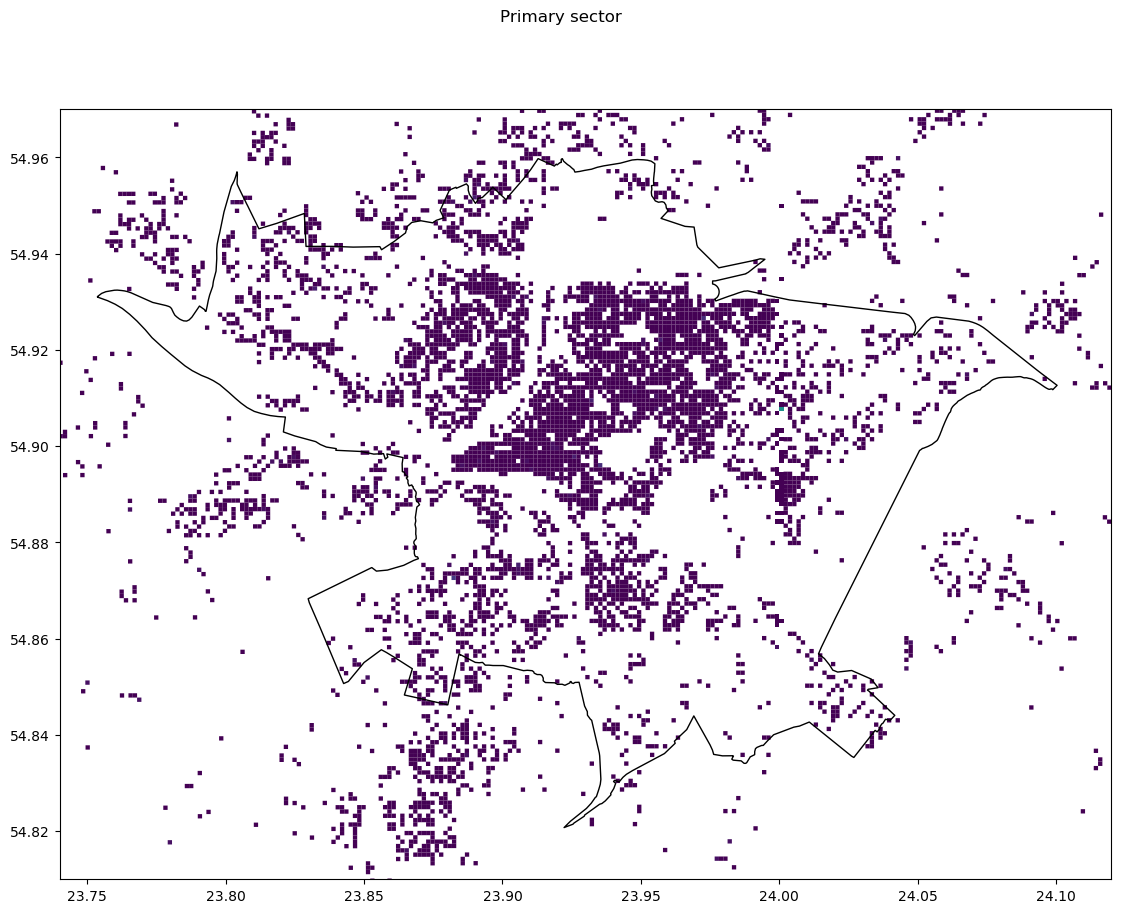

In [4]:
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots(1,1)

geo_data_2021_.plot(column = geo_data_2021_.a, ax = ax)

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))

exteriorLineScaled.plot(ax = ax, facecolor="none", edgecolor="black")

fig.suptitle('Primary sector')

Text(0.5, 0.98, 'Secondary sector')

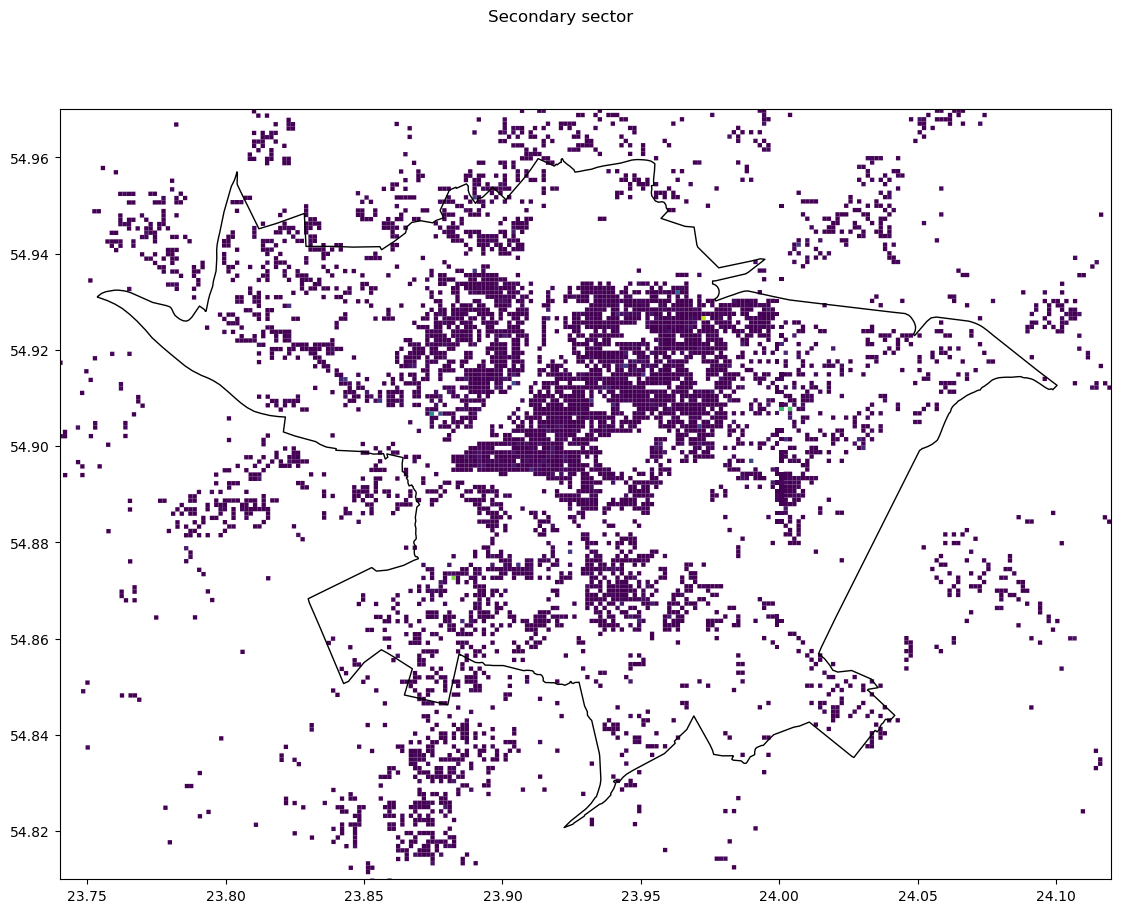

In [5]:
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots(1,1)

geo_data_2021_.plot(column = geo_data_2021_.b_c_d_e, ax = ax)

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))

exteriorLineScaled.plot(ax = ax, facecolor="none", edgecolor="black")

fig.suptitle('Secondary sector')

Text(0.5, 0.98, 'Construction')

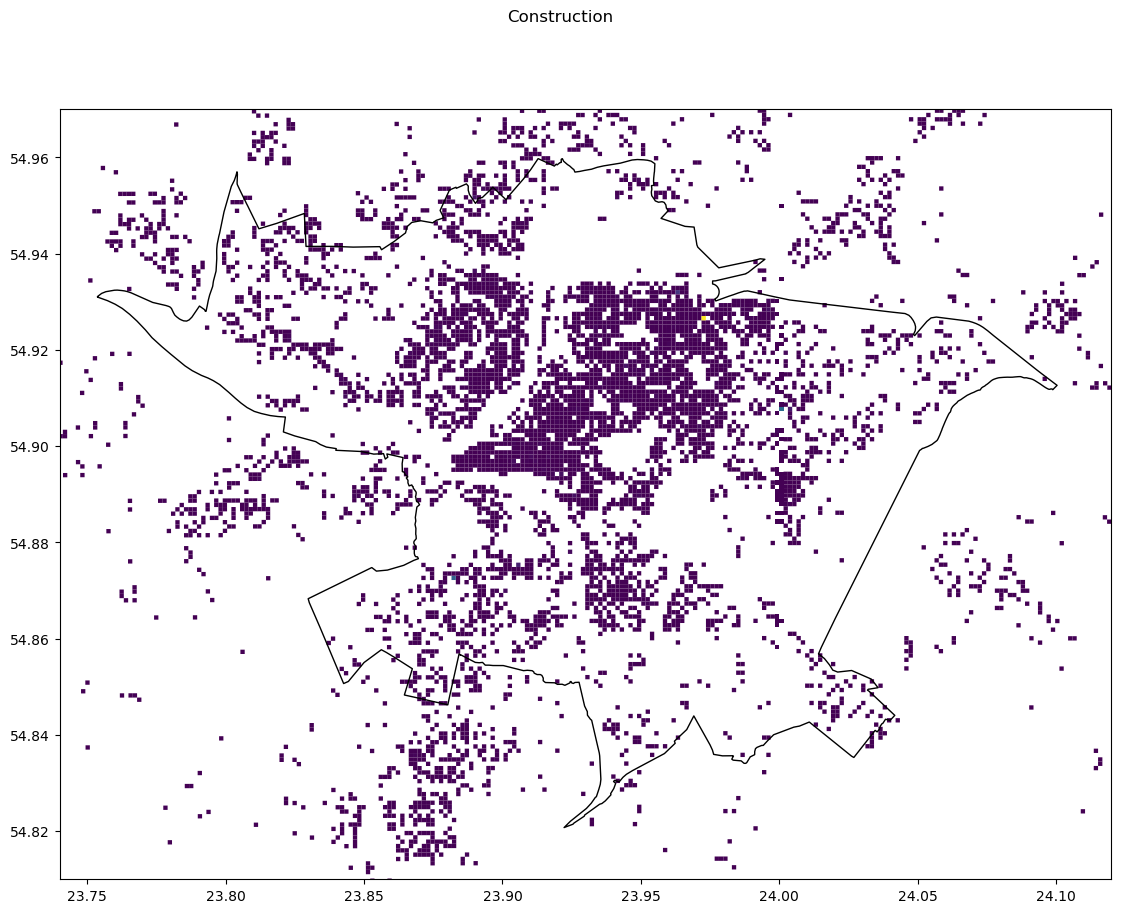

In [6]:
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots(1,1)

geo_data_2021_.plot(column = geo_data_2021_.f, ax = ax)

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))

exteriorLineScaled.plot(ax = ax, facecolor="none", edgecolor="black")

fig.suptitle('Construction')

Text(0.5, 0.98, 'Commerce and food sector')

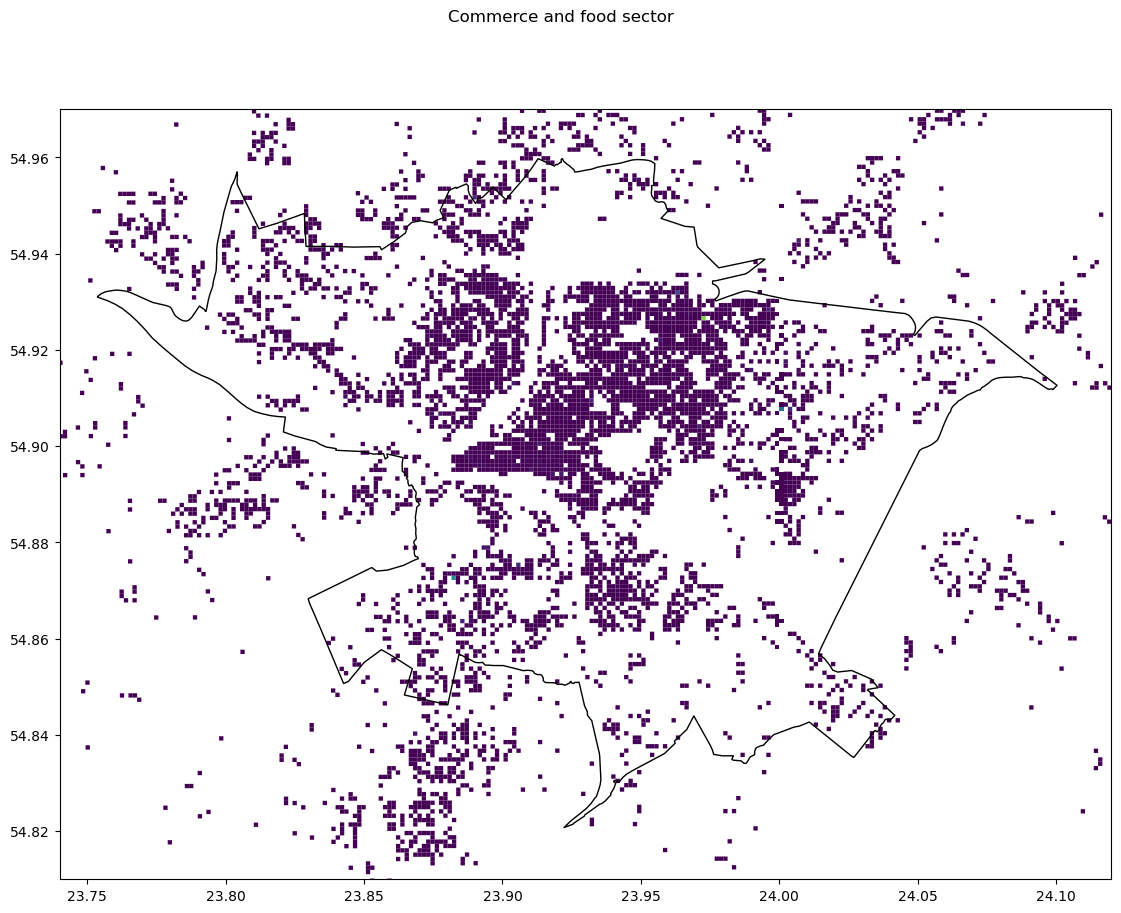

In [7]:
plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots(1,1)

geo_data_2021_.plot(column = geo_data_2021_.g_h_i, ax = ax)

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))

exteriorLineScaled.plot(ax = ax, facecolor="none", edgecolor="black")

fig.suptitle('Commerce and food sector')

Text(0.5, 0.98, 'Relevant economic sectors')

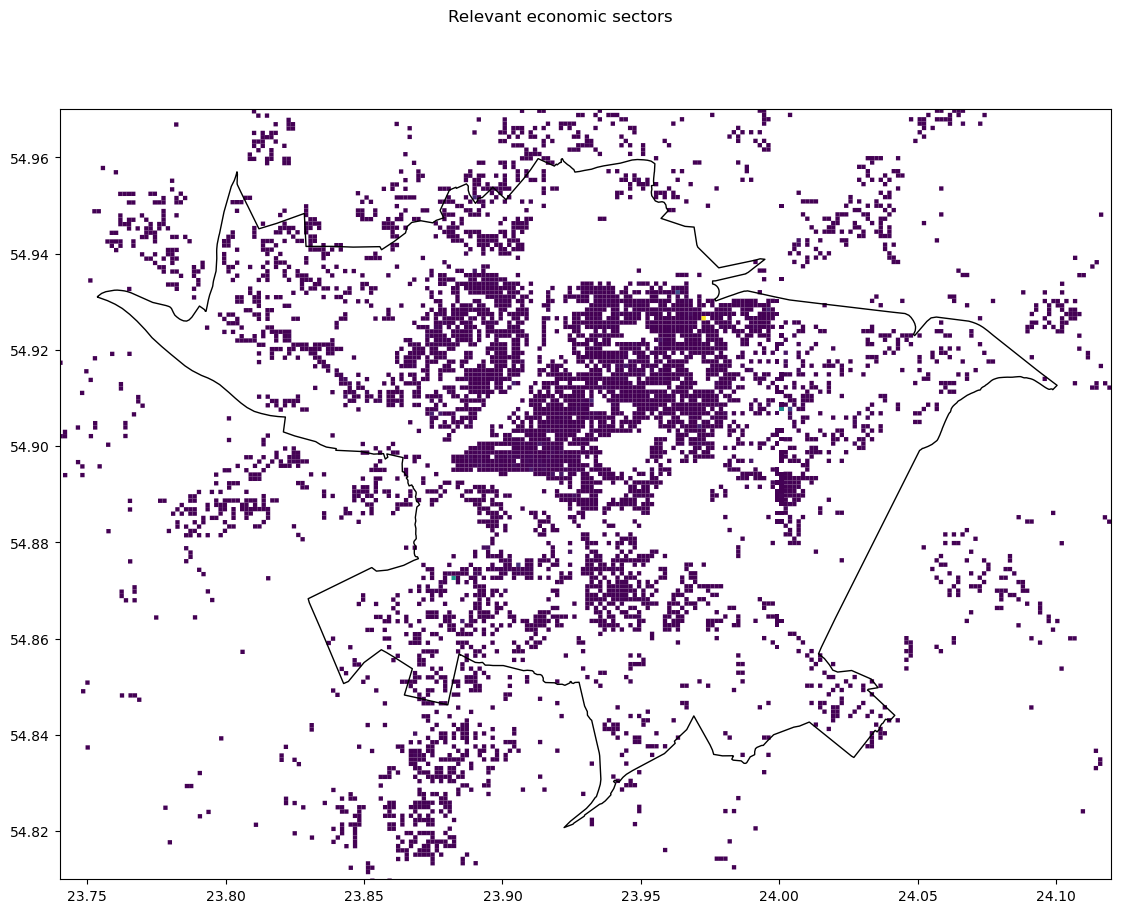

In [18]:
geo_data_2021_['a_b_c_d_e_f_g_h_i'] = geo_data_2021_['a'] \
                                + geo_data_2021_['b_c_d_e'] \
                                + geo_data_2021_['f'] \
                                + geo_data_2021_['g_h_i']

# print(geo_data_2021_[['grid_id','metai','a','b_c_d_e','f','g_h_i','a_b_c_d_e_f_g_h_i']].head())


plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots(1,1)

geo_data_2021_.plot(column = geo_data_2021_.a_b_c_d_e_f_g_h_i, ax = ax)

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))

exteriorLineScaled.plot(ax = ax, facecolor="none", edgecolor="black")

fig.suptitle('Relevant economic sectors')

Text(0.5, 0.98, 'Relevant economic sectors')

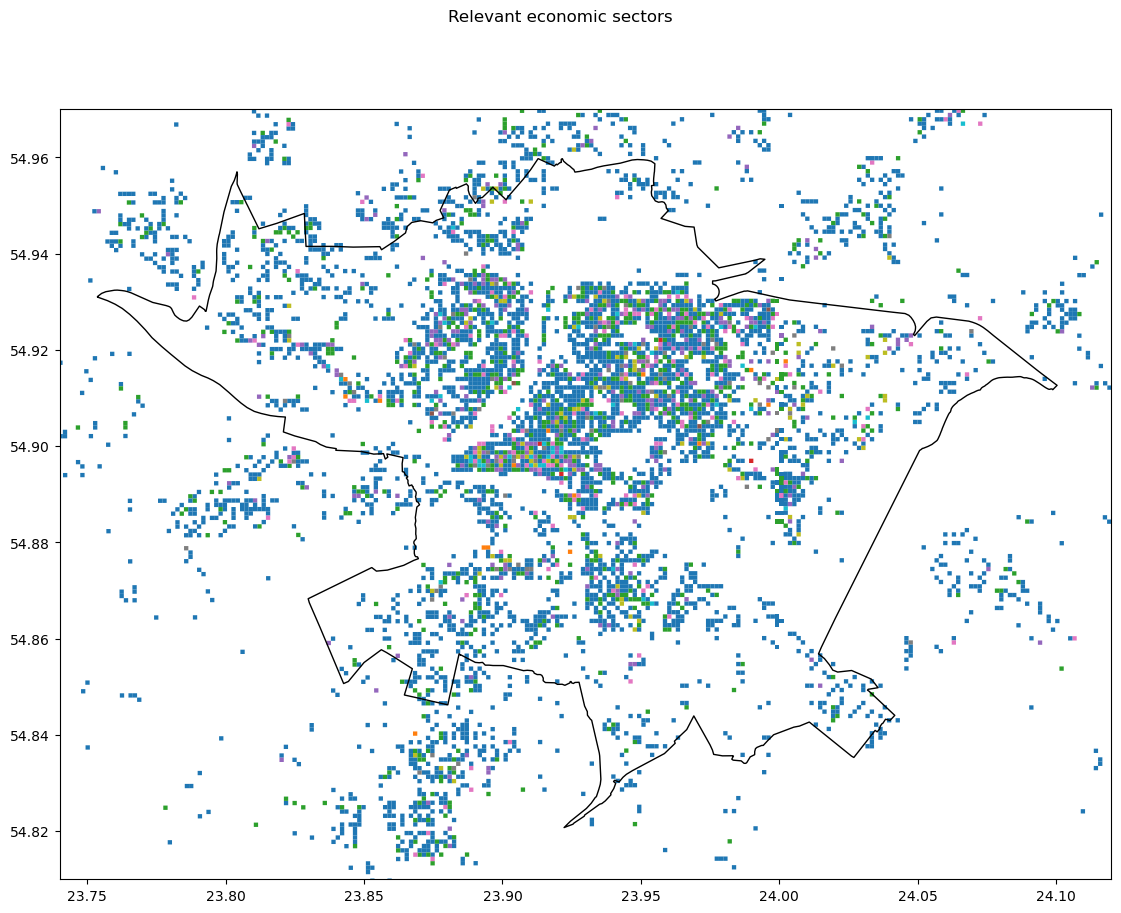

In [19]:
# initialise a dataframe with the right amount of rows
geo_data_2021_['a_b_c_d_e_f_g_h_i'] = geo_data_2021_['a']

for index, row in geo_data_2021_.iterrows():
    geo_data_2021_.at[index,'a_b_c_d_e_f_g_h_i'] = str(int(row['a']) + int(row['b_c_d_e']) + int(row['f']) + int(row['g_h_i']))
    val = row['a_b_c_d_e_f_g_h_i']

#print(geo_data_2021_[['grid_id','metai','a','b_c_d_e','f','g_h_i','a_b_c_d_e_f_g_h_i']].head())

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots(1,1)

geo_data_2021_.plot(column = geo_data_2021_.a_b_c_d_e_f_g_h_i, ax = ax)

plt.ylim((54.81, 54.97))
plt.xlim((23.74, 24.12))

exteriorLineScaled.plot(ax = ax, facecolor="none", edgecolor="black")

fig.suptitle('Relevant economic sectors')